### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('/Users/chanhiukiu/Documents/professional development/learning/lse data analytics career accelerator/course 3/assignment 3/LSE_DA301_assignment_files/turtle_reviews.csv') 

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews.drop(['language','platform'], axis=1)

# View column names.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [7]:
# Rename the column headers.
reviews.rename(columns = {'remuneration (k£)':'annual_income',
                          'spending_score (1-100)':'spending_score'}, inplace=True)

# View column names.
reviews.head()

,gender,age,annual_income,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('/Users/chanhiukiu/Documents/professional development/learning/lse data analytics career accelerator/course 3/assignment 3/LSE_DA301_assignment_files/clean_reviews.csv')

In [9]:
# Import new CSV file with Pandas.
clean_reviews = pd.read_csv ('/Users/chanhiukiu/Documents/professional development/learning/lse data analytics career accelerator/course 3/assignment 3/LSE_DA301_assignment_files/clean_reviews.csv')

# View DataFrame.
clean_reviews.head()

,Unnamed: 0,gender,age,annual_income,spending_score,loyalty_points,education,language,platform,product,review,summary
0,0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

<Figure size 432x288 with 0 Axes>

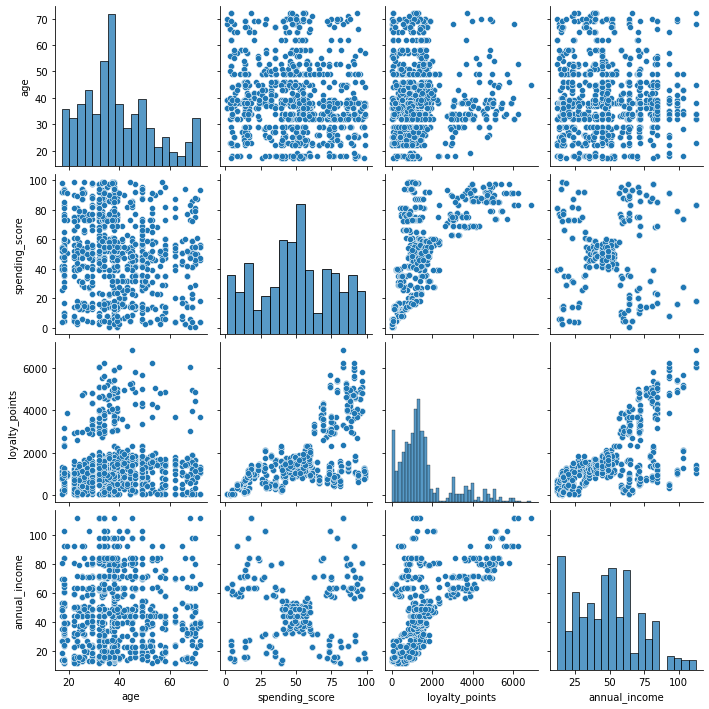

In [10]:
#Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Review the relationship and spread of data with pair plot
plt.figure()
sns.pairplot(clean_reviews, vars=['age', 'spending_score', 'loyalty_points', 'annual_income'])
plt.show()

### 5a) spending vs loyalty

In [11]:
# Independent variable.
x = clean_reviews['spending_score'] 

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
spending_loyalty = ols(f, data = clean_reviews).fit()
spending_loyalty.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        22:36:35   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Extract the estimated parameters.
print("Estimated Parameters:", spending_loyalty.params)

Estimated Parameters: Intercept   -75.052663
x            33.061693
dtype: float64


In [13]:
# Extract the standard errors.
print("Standard Errors:", spending_loyalty.bse)

Standard Errors: Intercept    45.930554
x             0.814419
dtype: float64


In [14]:
# Extract the predicted values.
print("Predicted Values:", spending_loyalty.predict())

Predicted Values: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [15]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 33.061693 * x -75.052663

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

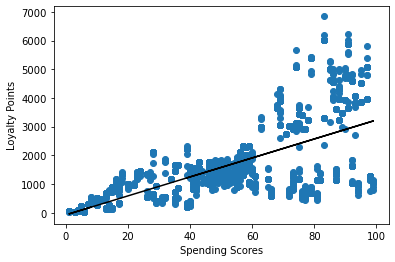

In [16]:
# Plot the graph with a regression line.
plt.scatter(x,y)
plt.plot(x,y_pred,color='black')
plt.xlabel("Spending Scores")
plt.ylabel("Loyalty Points")

### 5b) renumeration vs loyalty

In [17]:
# Independent variable.
x = clean_reviews['annual_income'] 

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
income_loyalty = ols(f, data = clean_reviews).fit()
income_loyalty.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        22:36:35   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Extract the estimated parameters.
print("Estimated Parameters:", income_loyalty.params)

Estimated Parameters: Intercept   -65.686513
x            34.187825
dtype: float64


In [19]:
# Extract the standard errors.
print("Standard Errors:", income_loyalty.bse)

Standard Errors: Intercept    52.170717
x             0.977925
dtype: float64


In [20]:
# Extract the predicted values.
print("Predicted Values:", income_loyalty.predict())

Predicted Values: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [21]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 34.187825 * x -65.686513

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: annual_income, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

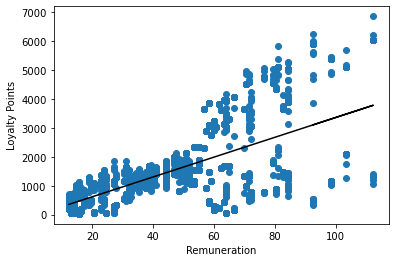

In [22]:
# Plot the graph with a regression line.
plt.scatter(x,y)
plt.plot(x,y_pred,color='black')
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")

### 5c) age vs loyalty

In [23]:
# Independent variable.
x = clean_reviews['age'] 

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
age_loyalty = ols(f, data = clean_reviews).fit()
age_loyalty.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 11 Sep 2022   Prob (F-statistic):             0.0577
Time:                        22:36:35   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Extract the estimated parameters.
print("Estimated Parameters:", age_loyalty.params)

Estimated Parameters: Intercept    1736.517739
x              -4.012805
dtype: float64


In [25]:
# Extract the standard errors.
print("Standard Errors:", age_loyalty.bse)

Standard Errors: Intercept    88.248731
x             2.113177
dtype: float64


In [26]:
# Extract the predicted values.
print("Predicted Values:", age_loyalty.predict())

Predicted Values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [27]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -4.012805 * x +1736.517739

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty Points')

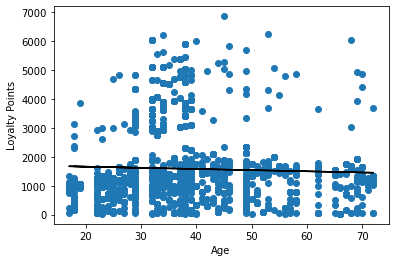

In [28]:
# Plot the graph with a regression line.
plt.scatter(x,y)
plt.plot(x,y_pred,color='black')
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

## 6. Additional deep dive

In [29]:
# Gender: Understand the distribution of the collected data

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

count_values_in_column(reviews,'gender')

,Total,Percentage
Female,1120,56.0
Male,880,44.0


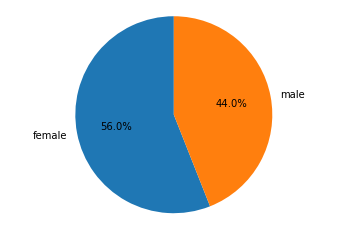

In [30]:
import matplotlib.pyplot as plt

# Create pie chart for better visualisation
labels = 'female', 'male'
sizes = [1120, 880]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [31]:
# Education: Understand the distribution of the collected data

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

count_values_in_column(reviews,'education')

,Total,Percentage
graduate,900,45.0
PhD,460,23.0
postgraduate,400,20.0
diploma,190,9.5
Basic,50,2.5


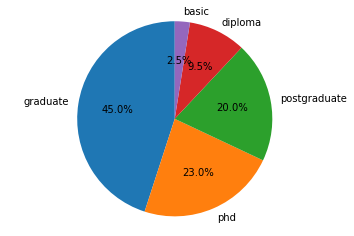

In [32]:
# Create pie chart for better visualisation
labels = 'graduate', 'phd', 'postgraduate', 'diploma', 'basic'
sizes = [900, 460, 400, 190, 50]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 7. Observations and insights

***Your observations here...***






- Both spending scores and annual income do have positive relationship with the loyalty points. This indicates that customers with higher spending scores or higher annual income tend to have a higher loyalty points with them. The impact of annual income is slightly more than spending scores givent that the difference in coefficient. Yet the Adj. R-squared is too low that the model might not be accurate enough. We recommend to try with different model for a more accurate result.
- In contrast, age has a relatively weak and negative relationship with score points with a negative coefficient. This indicates customers tend to lower their loyalty when they get older, this might due to the increase in shopping option. Similar with the above, the Adj. R-squared is not credible enough to fully trust the model.
- It is interesting to further explore if other variables such as gender and education will have strong relationship with the loyalty points. It will be good to also explore other model for better accuracy.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [33]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [34]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('/Users/chanhiukiu/Documents/professional development/learning/lse data analytics career accelerator/course 3/assignment 3/LSE_DA301_assignment_files/clean_reviews.csv') 

# View the DataFrame.
df2.head()

,Unnamed: 0,gender,age,annual_income,spending_score,loyalty_points,education,language,platform,product,review,summary
0,0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [35]:
# Drop unnecessary columns.
df2.drop(['Unnamed: 0', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary', 'language', 'platform'], 
          axis=1, 
          inplace=True)

# View DataFrame.
df2.head()

,gender,annual_income,spending_score
0,Male,12.30,39
1,Male,12.30,81
2,Female,13.12,6
3,Female,13.12,77
4,Female,13.94,40


In [36]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   annual_income   2000 non-null   float64
 2   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [37]:
# Descriptive statistics.
df2.describe()

,annual_income,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

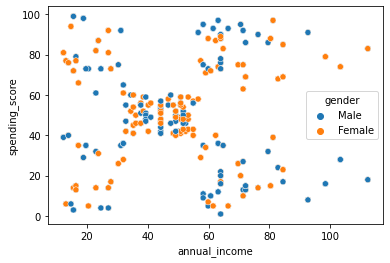

In [38]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x = 'annual_income', 
                y = 'spending_score', 
                hue = 'gender', 
                data = df2)

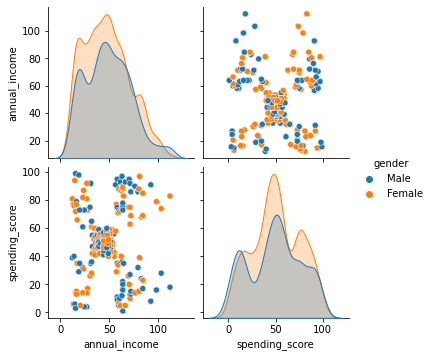

In [39]:
# Create a pairplot with Seaborn.
x = df2[['annual_income', 'spending_score']]
sns.pairplot(data=df2, vars=x, hue='gender', diag_kind='kde')

## 3. Elbow and silhoutte methods

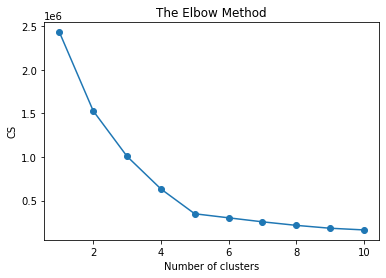

In [40]:
# Determine the number of clusters: Elbow method.
cs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
    
# Plot the Elbow method.
plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

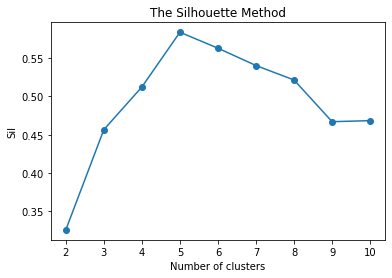

In [41]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

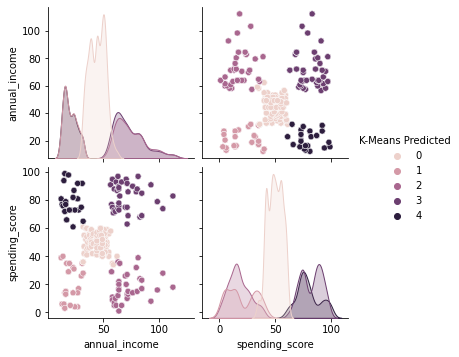

In [42]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter=15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters 

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

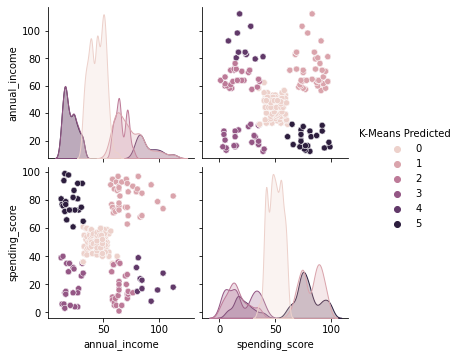

In [43]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter=15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters 

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

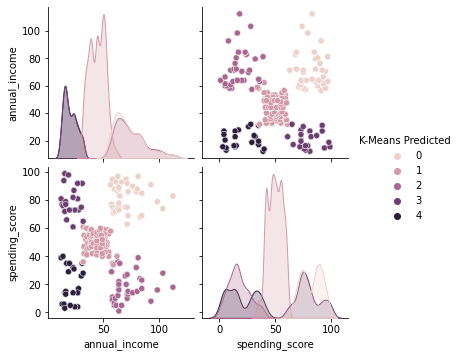

In [44]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, max_iter=15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters 

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [45]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

   annual_income  spending_score  K-Means Predicted
0          12.30              39                  4
1          12.30              81                  3
2          13.12               6                  4
3          13.12              77                  3
4          13.94              40                  4


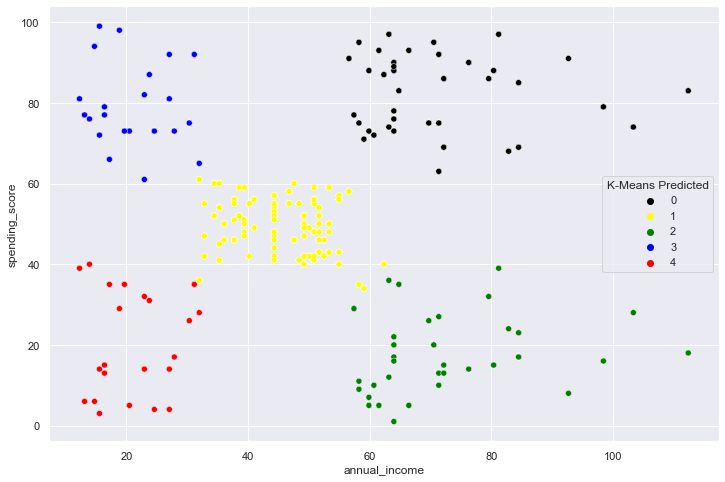

In [46]:
# Visualising the clusters.
sns.set(rc={'figure.figsize':(12,8)})

sns.scatterplot(x='annual_income', 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['black', 'yellow', 'green', 'blue', 'red'])

# View the DataFrame.
print(x.head())

## 7. Discuss: Insights and observations

***Your observations here...***

**Elbow Method & Silhoutte Method**
- The curve start to straighten after 5 in Elbow Method and hence I have test the data again with Silhoutte Method that it is clearly indiciate 5 clusuters are the best for the considered dataset
- The 2 method helps to categorise the data into 5 clusters so that we can further deep dive into the data

**The 5 Clusters**
1. Low annual income and high spending score
2. Low annual income and low spending score
3. Average annual income and spending score
4. High annual income and high spending score
5. High annual income and low spending score

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [47]:
conda install -c conda-forge wordcloud

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39h6e9494a_0        1022 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wordcloud-1.8.2.2          |   py39ha30fb19_1         175 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.9-2_cp39
  wordcloud          conda-forge/osx-64::wordcloud-1.8.2.2-py3

In [48]:
conda install -c conda-forge textblob

Solving environment: done

## Package Plan ##

  environment location: /usr/local/anaconda3

  added / updated specs:
    - textblob


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    textblob-0.15.3            |             py_0         595 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         595 KB

The following NEW packages will be INSTALLED:

  textblob           conda-forge/noarch::textblob-0.15.3-py_0



textblob-0.15.3      | 595 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: | WARNING conda.core.path_actions:verify(958): Unable to create environments file. Path not writable.
  environment location: /Users/chanhiukiu/.conda/environments.txt

done
Executing transaction: done
Retrieving notices: ...working... done

Note: you may need to rest

In [49]:
# Import Additional Necessary Packages.
import nltk 
import os

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chanhiukiu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chanhiukiu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Load the data set as df3.
df3 = pd.read_csv('/Users/chanhiukiu/Documents/professional development/learning/lse data analytics career accelerator/course 3/assignment 3/LSE_DA301_assignment_files/clean_reviews.csv') 

# View the DataFrame.
df3.head()

,Unnamed: 0,gender,age,annual_income,spending_score,loyalty_points,education,language,platform,product,review,summary
0,0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [52]:
# Explore data set.
print(df3.shape)
print(df3.columns)
df3.info()

(2000, 12)
Index(['Unnamed: 0', 'gender', 'age', 'annual_income', 'spending_score',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   annual_income   2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   language        2000 non-null   object 
 8   platform        2000 non-null   object 
 9   product         2000 non-null   int64  
 10  review          2000 non-null   object 
 11  summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1

In [53]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review','summary']]

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [54]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [55]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [56]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [57]:
# Review the dataframe
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [58]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [59]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [60]:
# Check for duplicated rows in review column
df3.review.duplicated().sum()

50

In [61]:
# Check for duplicated rows in summary column
df3.summary.duplicated().sum()

649

In [62]:
# Check for duplicated rows in both columns
df3.duplicated().sum()

39

In [63]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=None)
df3.reset_index(inplace=True)

# View DataFrame.
print(df3.shape)
df3.head()

(1961, 3)


,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [64]:
# Create new DataFrame (copy DataFrame).
df3_wordcloud = df3.copy()

# View DataFrame.
df3_wordcloud

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


In [65]:
# Create new DataFrame (copy DataFrame).
review_wordcloud = df3_wordcloud[['review']]

# View DataFrame.
review_wordcloud

,review
0,when it comes to a dms screen the space on the...
1,an open letter to galeforce9 your unpainted mi...
2,nice art nice printing why two panels are fill...
3,amazing buy bought it as a gift for our new dm...
4,as my review of gf9s previous screens these we...
...,...
1956,the perfect word game for mixed ages with mom ...
1957,great game did not think i would like it when ...
1958,great game for all keeps the mind nimble
1959,fun game


In [66]:
# Create new DataFrame (copy DataFrame).
summary_wordcloud = df3_wordcloud[['summary']]

# View DataFrame.
summary_wordcloud

,summary
0,the fact that 50 of this space is wasted on ar...
1,another worthless dungeon masters screen from ...
2,pretty but also pretty useless
3,five stars
4,money trap
...,...
1956,the perfect word game for mixed ages with mom
1957,super fun
1958,great game
1959,four stars


In [67]:
# Apply tokenisation to both columns.
review_wordcloud['tokens'] = review_wordcloud['review'].apply(word_tokenize)

# View DataFrame.
review_wordcloud

,review,tokens
0,when it comes to a dms screen the space on the...,"[when, it, comes, to, a, dms, screen, the, spa..."
1,an open letter to galeforce9 your unpainted mi...,"[an, open, letter, to, galeforce9, your, unpai..."
2,nice art nice printing why two panels are fill...,"[nice, art, nice, printing, why, two, panels, ..."
3,amazing buy bought it as a gift for our new dm...,"[amazing, buy, bought, it, as, a, gift, for, o..."
4,as my review of gf9s previous screens these we...,"[as, my, review, of, gf9s, previous, screens, ..."
...,...,...
1956,the perfect word game for mixed ages with mom ...,"[the, perfect, word, game, for, mixed, ages, w..."
1957,great game did not think i would like it when ...,"[great, game, did, not, think, i, would, like,..."
1958,great game for all keeps the mind nimble,"[great, game, for, all, keeps, the, mind, nimble]"
1959,fun game,"[fun, game]"


In [68]:
# Define an empty list of review tokens.
review_token_list = []

for i in range(review_wordcloud.shape[0]):
    # Add each token to the list.
    review_token_list = review_token_list + review_wordcloud['tokens'][i]
    
# Define an empty string variable for WordCloud.
review_token_str = ''
for word in review_token_list :
    review_token_str = review_token_str + word + ' '

In [69]:
# Review: Create a word cloud.
review_wordcloud = WordCloud(width = 1600, height = 900, 
                             background_color ='white',
                             colormap = 'plasma', 
                             stopwords = 'none',
                             min_font_size = 10).generate(review_token_str)

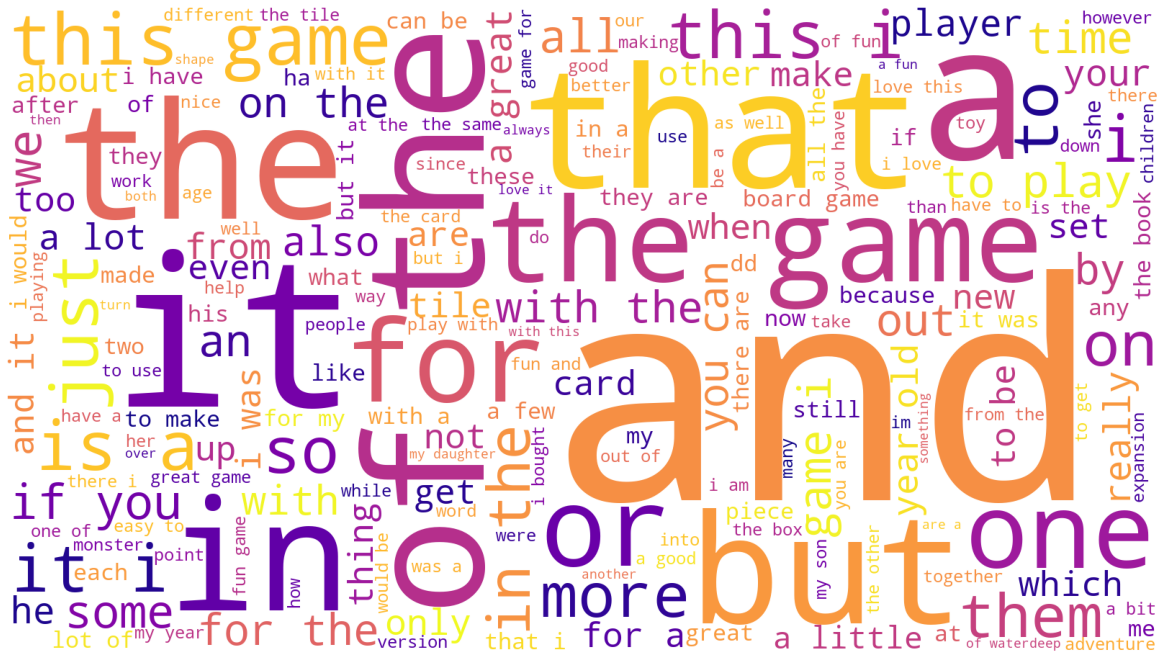

In [70]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [71]:
# Apply tokenisation to both columns.
summary_wordcloud['tokens'] = summary_wordcloud['summary'].apply(word_tokenize)

# View DataFrame.
summary_wordcloud

,summary,tokens
0,the fact that 50 of this space is wasted on ar...,"[the, fact, that, 50, of, this, space, is, was..."
1,another worthless dungeon masters screen from ...,"[another, worthless, dungeon, masters, screen,..."
2,pretty but also pretty useless,"[pretty, but, also, pretty, useless]"
3,five stars,"[five, stars]"
4,money trap,"[money, trap]"
...,...,...
1956,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w..."
1957,super fun,"[super, fun]"
1958,great game,"[great, game]"
1959,four stars,"[four, stars]"


In [72]:
# Define an empty list of review tokens.
summary_token_list = []

for i in range(summary_wordcloud.shape[0]):
    # Add each token to the list.
    summary_token_list = summary_token_list + summary_wordcloud['tokens'][i]
    
# Define an empty string variable for WordCloud.
summary_token_str = ''
for word in summary_token_list :
    summary_token_str = summary_token_str + word + ' '

In [73]:
# Summary: Create a word cloud.
summary_wordcloud = WordCloud(width = 1600, height = 900, 
                             background_color ='white',
                             colormap = 'plasma', 
                             stopwords = 'none',
                             min_font_size = 10).generate(summary_token_str)

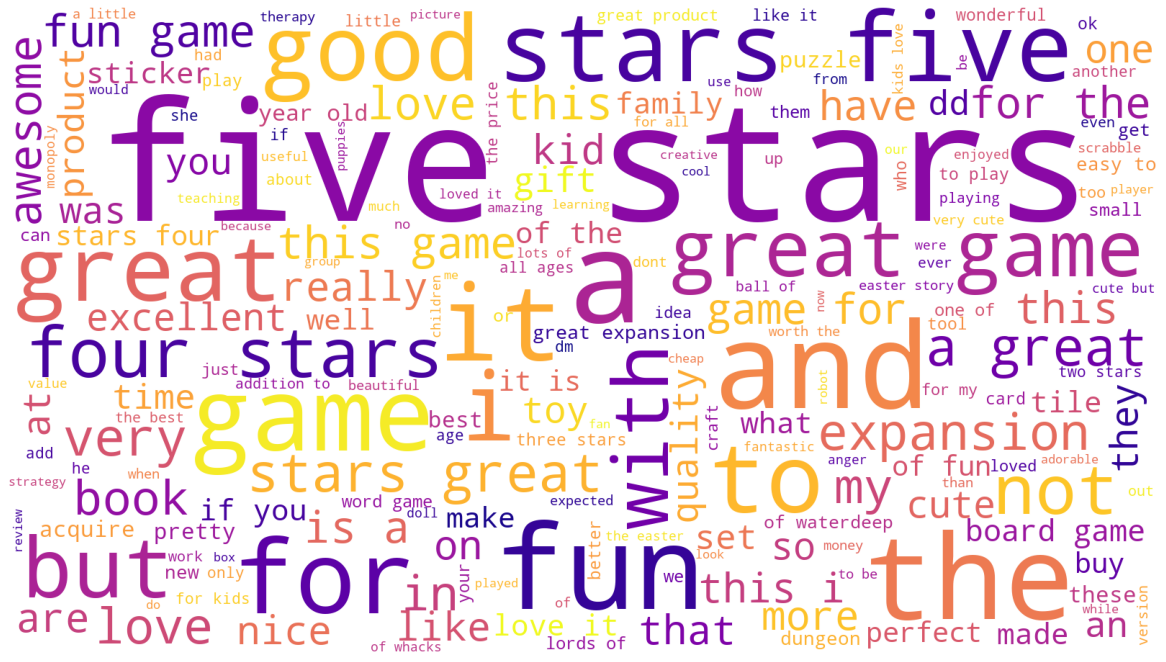

In [74]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(summary_wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [75]:
# Review: Determine the frequency distribution.
fdist_review = FreqDist(review_token_list)
fdist_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [76]:
# Summary: Determine the frequency distribution.
fdist_summary = FreqDist(summary_token_list)
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [77]:
# Delete all the alpanum.
review_token_2 = [x for x in review_token_list if x.isalnum()]
summary_token_2 = [x for x in summary_token_list if x.isalnum()]

In [78]:
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Remove all the stopwords
review_token_clean = [x for x in review_token_2 if x.lower() not in english_stopwords]
summary_token_clean = [x for x in summary_token_2 if x.lower() not in english_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chanhiukiu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

In [79]:
# Review without Stopword: Create a word cloud
review_token_str_2 = ''
for word in review_token_clean :
    review_token_str_2 = review_token_str_2 + word + ' '

In [80]:
# Review without Stopword: Create a word cloud.
review_wordcloud_2 = WordCloud(width = 1600, height = 900, 
                              background_color ='white',
                              colormap = 'plasma', 
                              min_font_size = 10).generate(review_token_str_2)

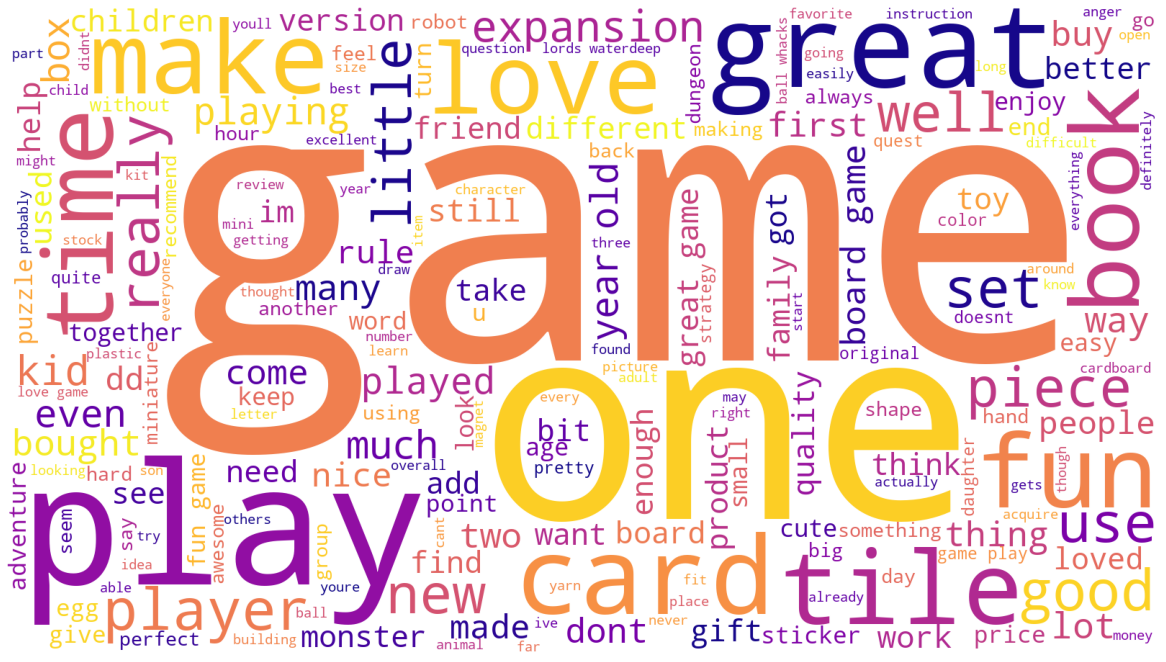

In [81]:
# Review without Stopword: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_wordcloud_2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [82]:
# Summary without Stopword: Create a word cloud
summary_token_str_2 = ''
for word in summary_token_clean :
    summary_token_str_2 = summary_token_str_2 + word + ' '

In [83]:
# Summary without Stopword: Create a word cloud.
summary_wordcloud_2 = WordCloud(width = 1600, height = 900, 
                               background_color ='white',
                               colormap = 'plasma', 
                               min_font_size = 10).generate(summary_token_str_2)

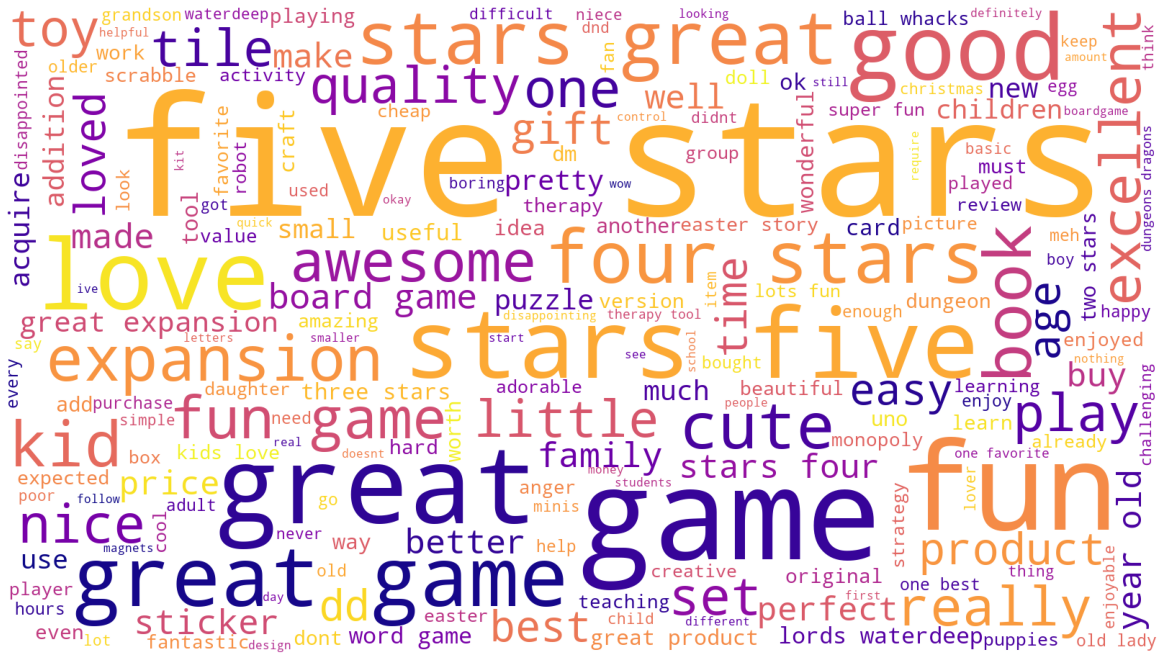

In [84]:
# Summary without Stopword: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(summary_wordcloud_2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [85]:
# Review: Determine the 15 most common words.
review_count = pd.DataFrame(Counter(review_token_clean).most_common(15),
                            columns=['Word', 'Frequency']).set_index('Word')

review_count

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


In [86]:
# Summary: Determine the 15 most common words.
summary_count = pd.DataFrame(Counter(summary_token_clean).most_common(15),
                             columns=['Word', 'Frequency']).set_index('Word')

summary_count

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [87]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [88]:
# Determine polarity of both columns. 
df3['review_polarity']=df3['review'].apply(generate_polarity)
df3['summary_polarity']=df3['summary'].apply(generate_polarity)

# View output.
df3.head()

,index,review,summary,review_polarity,summary_polarity
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00


In [89]:
# Create a new column to to indicate the review sentiment
review_sentiment = []
for row in df3['review_polarity']:
    if row < 0 :   review_sentiment.append('negative')
    elif row == 0:  review_sentiment.append('neutral')
    elif row > 0:  review_sentiment.append('positive')

df3['review_sentiment'] = review_sentiment
df3

,index,review,summary,review_polarity,summary_polarity,review_sentiment
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.150000,negative
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.800000,positive
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.000000,positive
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.000000,positive
4,4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.000000,negative
...,...,...,...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,0.168750,0.200000,positive
1957,1996,great game did not think i would like it when ...,super fun,0.158333,0.316667,positive
1958,1997,great game for all keeps the mind nimble,great game,0.200000,0.200000,positive
1959,1998,fun game,four stars,-0.050000,0.000000,negative


In [90]:
# Create a new column to to indicate the summary sentiment
summary_sentiment = []
for row in df3['summary_polarity']:
    if row < 0 :   summary_sentiment.append('negative')
    elif row == 0:  summary_sentiment.append('neutral')
    elif row > 0:  summary_sentiment.append('positive')

df3['summary_sentiment'] = summary_sentiment
df3

,index,review,summary,review_polarity,summary_polarity,review_sentiment,summary_sentiment
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.150000,negative,positive
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.800000,positive,negative
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.000000,positive,neutral
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.000000,positive,neutral
4,4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.000000,negative,neutral
...,...,...,...,...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,0.168750,0.200000,positive,positive
1957,1996,great game did not think i would like it when ...,super fun,0.158333,0.316667,positive,positive
1958,1997,great game for all keeps the mind nimble,great game,0.200000,0.200000,positive,positive
1959,1998,fun game,four stars,-0.050000,0.000000,negative,neutral


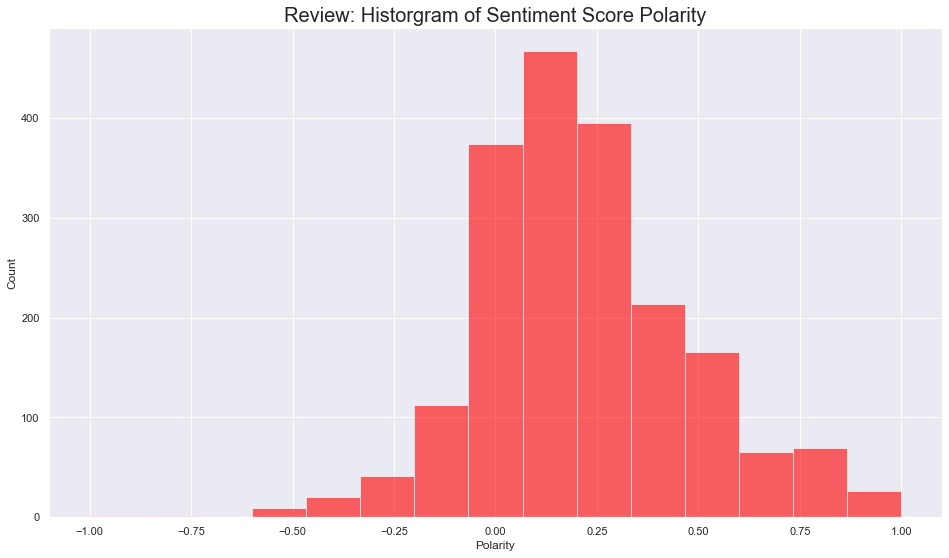

In [91]:
# Review: Create a histogram plot with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review: Historgram of Sentiment Score Polarity', fontsize=20)

plt.show()

In [92]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(df3,'review_sentiment')

,Total,Percentage
positive,1577,80.42
negative,303,15.45
neutral,81,4.13


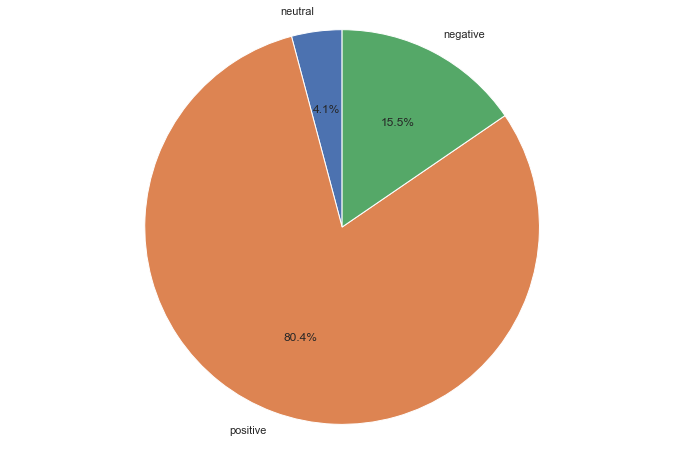

In [93]:
import matplotlib.pyplot as plt

# Create pie chart for better visualisation
labels = 'neutral', 'positive', 'negative'
sizes = [81, 1577, 303]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

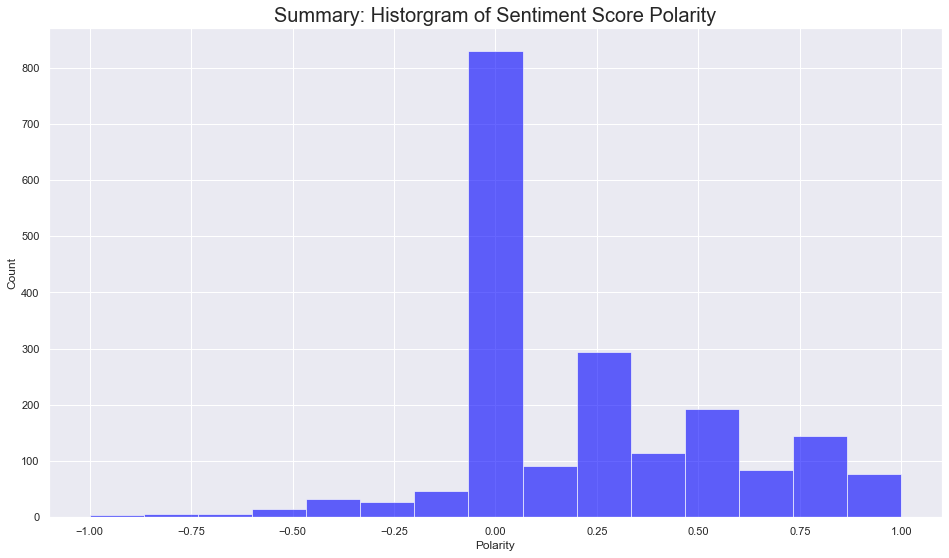

In [94]:
# Summary: Create a histogram plot with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['summary_polarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary: Historgram of Sentiment Score Polarity', fontsize=20)

plt.show()

In [95]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(df3,'summary_sentiment')

,Total,Percentage
positive,1058,53.95
neutral,711,36.26
negative,192,9.79


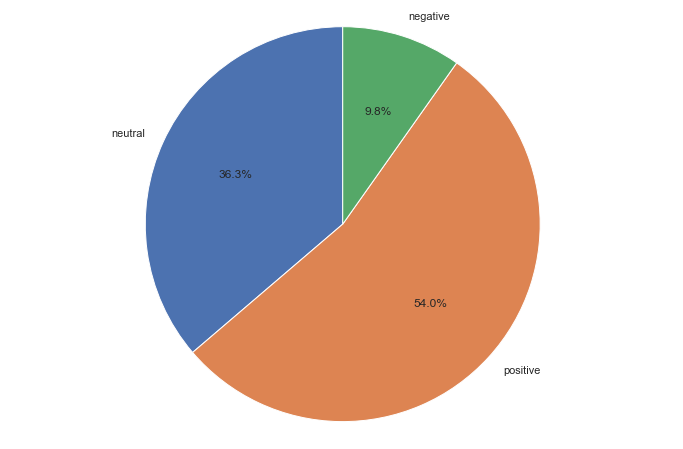

In [96]:
import matplotlib.pyplot as plt

# Create pie chart for better visualisation
labels = 'neutral', 'positive', 'negative'
sizes = [711, 1058, 192]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [97]:
# Top 20 negative reviews.
negative_sentiment_review = df3.nsmallest(20, 'review_polarity')
negative_sentiment_review = negative_sentiment_review[['review', 'review_polarity']]

# View output.
negative_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,review_polarity
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
181,incomplete kit very disappointing,-0.780000
1773,im sorry i just find this product to be boring and to be frank juvenile,-0.583333
362,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
116,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
226,this was a gift for my daughter i found it difficult to use,-0.500000
229,i found the directions difficult,-0.500000
289,instructions are complicated to follow,-0.500000
300,difficult,-0.500000
1501,expensive for what you get,-0.500000


In [98]:
# Top 20 negative summaries.
negative_sentiment_review = df3.nsmallest(20, 'summary_polarity')
negative_sentiment_review = negative_sentiment_review[['summary', 'summary_polarity']]

# View output.
negative_sentiment_review.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,summary_polarity
21,the worst value ive ever seen,-1.000000
207,boring unless you are a craft person which i am,-1.000000
819,boring,-1.000000
1148,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
143,disappointed,-0.750000
623,disappointed,-0.750000
785,disappointed,-0.750000
1591,disappointed,-0.750000
361,promotes anger instead of teaching calming methods,-0.700000


In [99]:
# Top 20 positive reviews.
positive_sentiment_review = df3.nlargest(20, 'review_polarity')
positive_sentiment_review = positive_sentiment_review[['review', 'review_polarity']]

# View output.
positive_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,review_polarity
7,came in perfect condition,1.000000
164,awesome book,1.000000
193,awesome gift,1.000000
489,excellent activity for teaching selfmanagement skills,1.000000
517,perfect just what i ordered,1.000000
583,wonderful product,1.000000
601,delightful product,1.000000
613,wonderful for my grandson to learn the resurrection story,1.000000
782,perfect,1.000000
923,awesome,1.000000


In [100]:
# Top 20 positive summaries.
positive_sentiment_summary = df3.nlargest(20, 'summary_polarity')
positive_sentiment_summary = positive_sentiment_summary[['summary', 'summary_polarity']]

# View output.
positive_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,summary_polarity
6,best gm screen ever,1.000000
28,wonderful designs,1.000000
32,perfect,1.000000
80,theyre the perfect size to keep in the car or a diaper,1.000000
133,perfect for preschooler,1.000000
139,awesome sticker activity for the price,1.000000
160,awesome book,1.000000
162,he was very happy with his gift,1.000000
186,awesome,1.000000
209,awesome and welldesigned for 9 year olds,1.000000


## 7 Discuss: Insights and observations

***Your observations here...***

Overall, we are seeing a positive sentiment on both summary and review for the Turtle Games. Over 80% of the reviews  and 54% of the summary are positive. This can also be reflected in the Wordcloud that majority of the words are positive, including fun, excellent, great, cute, kid...

To further explore the audience sentiment towards the Turtle Game, we deep dive into the top 20 positive and negative review and summary. Generally, we can see that the game is commonly used as a gifting present, people also enjoyed the design and found the game awesome. On the contrast, the negative sentiment stated that the game is boring, disappointing, difficult and complicated to follow. 

Moving forward, to better improve the Turtle Game customer experience, it will be great to conduct another survey with customers to have a better understanding on what worked the best and what can be further improve. 

# 